# Diamond Price prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.rename(columns = {"x" : "length", "y" : "width", "z" : "depth", "depth" : "depth_percent", "table":"table_percent"}, inplace = True)

In [5]:
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth_percent  53940 non-null  float64
 5   table_percent  53940 non-null  float64
 6   price          53940 non-null  int64  
 7   length         53940 non-null  float64
 8   width          53940 non-null  float64
 9   depth          53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe(include = 'all') # this include also shows categorical data also athorwise it shows only numerical

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [8]:
df.describe()

,carat,depth_percent,table_percent,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
# In this dataset we have a anamoly where length and width and depth has min 0 values , it
# says that the diamond will not exist with this 0 values.

In [10]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [11]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [12]:
# Checking for null values
df.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth_percent    0
table_percent    0
price            0
length           0
width            0
depth            0
dtype: int64

In [13]:
# First finding the ratio of x/y so as to identify the 0 values as well as how it correlates with other features
# present in the dataframe
df['L/W'] = df['length']/df['width']
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [14]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [15]:
# Obervations
# Some of the categorical values are not present in data such as color values from k to z
# clarity values such as I2 and I3 and also poor cut values are not there.

In [16]:
df.describe(include = 'all')

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944


### Obervation
we find the width , depth adn L/w have 0 values as minimum which connot exist for a diamond, so now lets find how many values are there which has 0.

In [17]:
print(df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0)])

       carat        cut color clarity  depth_percent  table_percent  price  \
2207    1.00    Premium     G     SI2           59.1           59.0   3142   
2314    1.01    Premium     H      I1           58.1           59.0   3167   
4791    1.10    Premium     G     SI2           63.0           59.0   3696   
5471    1.01    Premium     F     SI2           59.2           58.0   3837   
10167   1.50       Good     G      I1           64.0           61.0   4731   
11182   1.07      Ideal     F     SI2           61.6           56.0   4954   
11963   1.00  Very Good     H     VS2           63.3           53.0   5139   
13601   1.15      Ideal     G     VS2           59.2           56.0   5564   
15951   1.14       Fair     G     VS1           57.5           67.0   6381   
24394   2.18    Premium     H     SI2           59.4           61.0  12631   
24520   1.56      Ideal     G     VS2           62.2           54.0  12800   
26123   2.25    Premium     I     SI1           61.3           5

In [18]:
print('length:', len(df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0)]))

length: 20


### Obesration
There are 20 data points which have 0 values in on one or the other coloumn.

Since the number of datapoints with 0 values are very less, compared to the total number of datapoints so deleteling that will not affect out future models.

L/W coloumn value has NaN values which will happen when W = 0, so now to delete all these datapoints we first replace the 0 values with NaN values and then drop them using pandas drop

In [19]:
df[['length','width','depth','L/W']] = df[['length','width','depth','L/W']].replace(0, np.NaN)
df.dropna(inplace = True)

In [20]:
df.describe()

,carat,depth_percent,table_percent,price,length,width,depth,L/W
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [21]:
df.shape

(53920, 11)

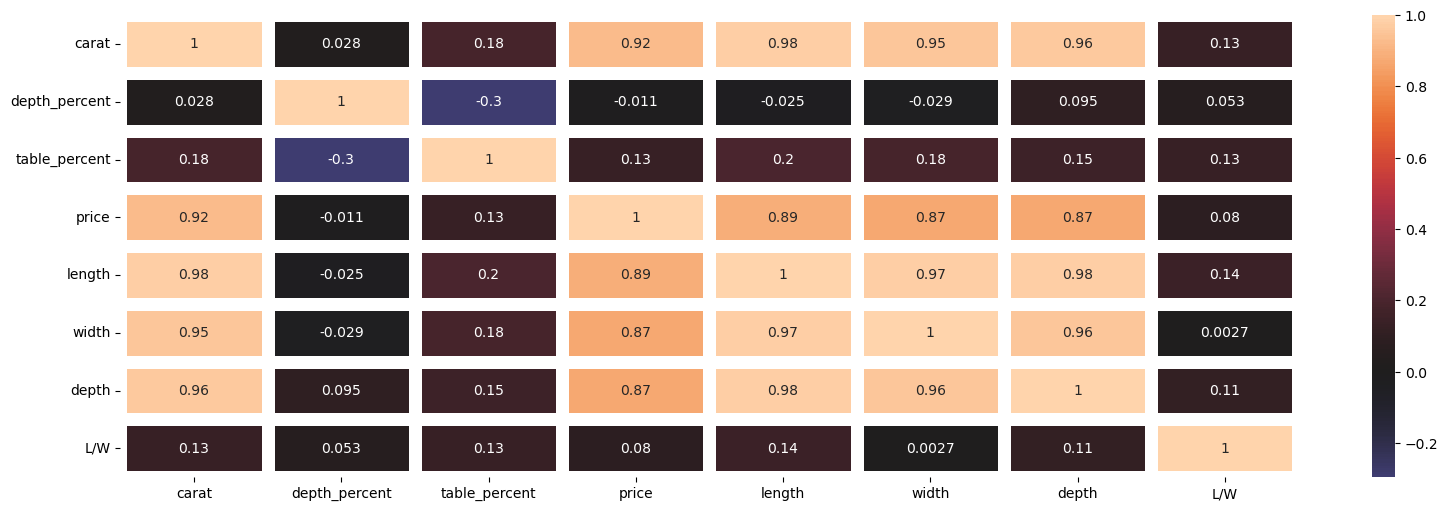

In [22]:
# Finding the corelation between the features of the given 
f,ax = plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, linewidths=8, center=0, ax=ax)
plt.show()

### Obervations -
We Find that price has high correlation with carat, length, width , and depth.

## Data Preprocessing

### Label Encoding (ordinal data)

In [23]:
# Label Encoding (ordinal data)
#['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
#['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
#['E', 'I', 'J', 'H', 'F', 'G', 'D']

df['clarity_score'] = df['clarity'].replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],[1,2,3,4,5,6,7,8])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_score'] = df['cut'].replace(['Ideal', 'Premium', 'Very Good','Good','Fair'],[5,4,3,2,1])
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,1,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,2,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,3,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,1,1,2


In [24]:
# Finding the skewness of output variable.
df['price'].skew()

1.6183486340820077

In [25]:
# Log transformation the output -->
# makes large values smaller
# reduces skewness
# stablizes variance 
df['price_log'] = pd.DataFrame({'price' : np.log(df['price'])})
df.head()
df.describe()

,carat,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score,price_log
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425,3.256250,4.405972,3.904228,7.786393
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666,1.766337,1.701272,1.116579,1.014540
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351,1.000000,1.000000,1.000000,5.786897
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625,2.000000,3.000000,3.000000,6.855409
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745,3.000000,4.000000,4.000000,7.783641
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944,4.000000,6.000000,5.000000,8.579839
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572,8.000000,7.000000,5.000000,9.842835


In [26]:
#Seprating the input(x) and outputs(y)
Y = df['price_log']
X = df[['carat','depth','length','width']]
        

In [27]:
# train and test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [28]:
cols = ['carat', 'depth', 'length', 'width']

In [29]:
# Standardizing the x train and Test
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_transformed = pd.DataFrame(scale.fit_transform(X_train),columns = cols, index = X_train.index)
X_test_transformed = pd.DataFrame(scale.fit_transform(X_test),columns = cols, index = X_test.index)
print(X_train_transformed)

          carat     depth    length     width
34119 -0.881034 -0.936431 -0.992441 -0.959951
16744  0.848923  1.049320  0.927950  0.864034
31353 -0.796646 -0.794592 -0.822732 -0.790070
41291 -0.923228 -0.993167 -1.028169 -0.995716
31081 -0.986519 -1.163374 -1.171082 -1.156656
...         ...       ...       ...       ...
45908 -0.205929  0.098996 -0.117100 -0.208899
52436 -0.205929 -0.014475 -0.063508 -0.021136
42630 -0.606773 -0.482545 -0.501178 -0.521837
43584 -0.627870 -0.525097 -0.608363 -0.745365
2734  -0.205929  0.013893 -0.090304 -0.047959

[43136 rows x 4 columns]


In [30]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43136 entries, 34119 to 2734
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   43136 non-null  float64
 1   depth   43136 non-null  float64
 2   length  43136 non-null  float64
 3   width   43136 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


## Model Building

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(X_train_transformed, Y_train)

# Making prediction
y_pred_LR = Regression.predict(X_test_transformed)

In [32]:
# Evaluation
from sklearn import metrics
mae_lr = metrics.mean_absolute_error(Y_test, y_pred_LR)
print('Mean Absolute Error :', mae_lr)
print('Mean Square Error :', metrics.mean_squared_error(Y_test, y_pred_LR))
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_LR)))

Mean Absolute Error : 0.20413062799168716
Mean Square Error : 0.07263155082675032
Root Mean Square Error : 0.26950241339689396


In [33]:
# KNN, DT, RF, SVR, GBDT

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()
RFreg.fit(X_train_transformed, Y_train)

# making prediction
y_pred_RF = RFreg.predict(X_test_transformed)

In [35]:
# Evaluation
from sklearn import metrics
mae_RF = metrics.mean_absolute_error(Y_test, y_pred_RF)
print('Mean Absolute Error :', mae_RF)
print('Mean Square Error :', metrics.mean_squared_error(Y_test, y_pred_RF))
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))

Mean Absolute Error : 0.2210804640879662
Mean Square Error : 0.07951679588752084
Root Mean Square Error : 0.2819872264616269


In [36]:
# KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
KNN_Reg = KNeighborsRegressor()
KNN_Reg.fit(X_train_transformed, Y_train)

# Making prediction
y_pred_KNN = KNN_Reg.predict(X_test_transformed)


In [41]:
# Evaluation
from sklearn import metrics
mae_KNN = metrics.mean_absolute_error(Y_test, y_pred_KNN)
print('Mean Absolute Error :', mae_KNN)
print('Mean Square Error :', metrics.mean_squared_error(Y_test, y_pred_KNN))
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_KNN)))

Mean Absolute Error : 0.21466515474640932
Mean Square Error : 0.07527478667546661
Root Mean Square Error : 0.27436250960265435


In [38]:
# Support Vector Machine
from sklearn.svm import SVR
SV_regression = SVR()
SV_regression.fit(X_train_transformed, Y_train)

# Making Prediction
y_pred_SVM = SV_regression.predict(X_test_transformed)

In [42]:
# Evaluation
from sklearn import metrics
mae_SVM = metrics.mean_absolute_error(Y_test, y_pred_SVM)
print('Mean Absolute Error :', mae_SVM)
print('Mean Square Error :', metrics.mean_squared_error(Y_test, y_pred_SVM))
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVM)))

Mean Absolute Error : 0.21319323230576362
Mean Square Error : 0.0754375222438304
Root Mean Square Error : 0.2746589198330001


In [43]:
evaluation = pd.DataFrame({'Algorithms':['Linear Regression','Random Forest','KNN Regression','Support Vector Machine'],"MAE" :[mae_lr,mae_RF,mae_KNN,mae_SVM]})
evaluation

,Algorithms,MAE
0,Linear Regression,0.204131
1,Random Forest,0.221080
2,KNN Regression,0.214665
3,Support Vector Machine,0.213193


## Conclusion
#### By this conclusion We can conclude that Linear Regression gives Minimum Error value and its gives optimal solution.